In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data = pd.read_csv('data/Hitters.csv').dropna()
df = pd.get_dummies(data, columns=['League', 'Division', 'NewLeague'], drop_first=True)
df['Salary'] = np.log(df['Salary'])
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,6.551080,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,6.774224,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,5.953243,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,6.866933,0,0,0


In [25]:
X = df.drop(columns='Salary')
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=200, random_state=0)

R2 training score: 0.9813.

MSE training error: 0.0140.

R2 test score: 0.8442.

MSE test error: 0.1411.



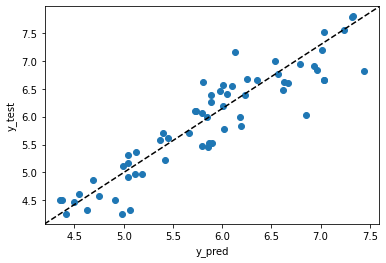

In [27]:
# Create Boosting 
boosting = GradientBoostingRegressor(n_estimators=1000, max_depth=3, learning_rate=0.01, random_state=1)
boosting.fit(X_train, y_train)

# Return R2
print('R2 training score: {:.4f}.\n'.format(boosting.score(X_train, y_train)))

# Return MSE training error
print('MSE training error: {:.4f}.\n'.format(mean_squared_error(y_train, boosting.predict(X_train))))

# Calculate R2 test score
y_pred = boosting.predict(X_test)
print('R2 test score: {:.4f}.\n'.format(r2_score(y_test, y_pred)))

print('MSE test error: {:.4f}.\n'.format(mean_squared_error(y_test, y_pred)))

# Plot Chart y_pred, y_test
# plt.figure(8,6)
plt.scatter(y_pred, y_test)
plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [28]:
lamda_range = np.arange(0.001, 0.101, 0.001)
train_mse = []
test_mse = []

for i in lamda_range:
    boosting = GradientBoostingRegressor(n_estimators=1000, max_depth=3, learning_rate=i, random_state=1).fit(X_train, y_train)
    y_pred = boosting.predict(X_test)
    train_mse.append(mean_squared_error(y_train, boosting.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, y_pred))

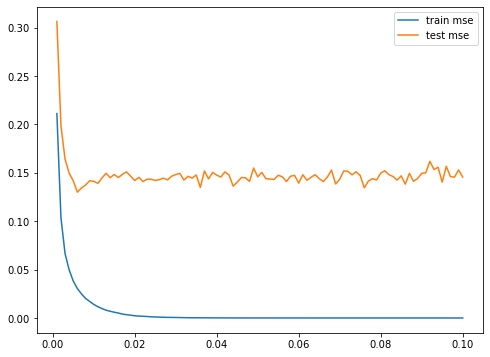

In [29]:
plt.figure(figsize=(8,6))
plt.plot(lamda_range, train_mse, label='train mse')
plt.plot(lamda_range, test_mse, label='test mse')
plt.legend()
plt.show()

In [30]:
# Lamda from 0.01 to 0.1 get same result
# Lamda < 0.01 is too small, make grow of trees too slow to drop test mse

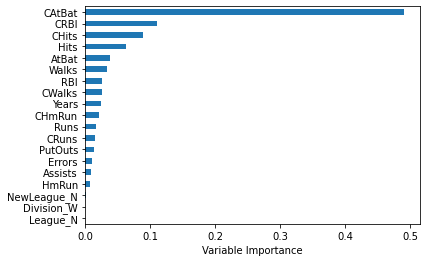

In [31]:
# Create feature importances
feature_importances = pd.DataFrame(boosting.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance').plot(kind='barh')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

R2 training score: 0.9547

MSE training error: 0.0340

R2 test score: 0.8437

MSE test error: 0.1415



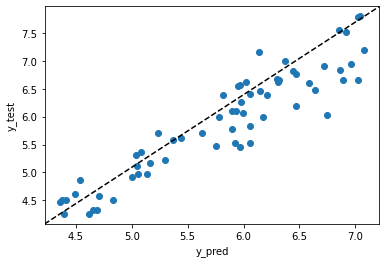

In [32]:
bagging = RandomForestRegressor(random_state=1, n_estimators=500)
bagging.fit(X_train, y_train)

# Return R2
print('R2 training score: {:.4f}'.format(bagging.score(X_train, y_train)))
print('')
# Return MSE training error
print('MSE training error: {:.4f}'.format(mean_squared_error(y_train, bagging.predict(X_train))))
print('')

# Calculate R2 test score
y_pred = bagging.predict(X_test)
print('R2 test score: {:.4f}'.format(r2_score(y_test, y_pred)))
print('')
print('MSE test error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('')

# Plot Chart y_pred, y_test
# plt.figure(8,6)
plt.scatter(y_pred, y_test)
plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [33]:
# Bagging have higher test mse compare to boosting